<a href="https://colab.research.google.com/github/Mercury1565/Audio-Noise-Reduction-System/blob/main/DSP_Audio_Noise_Reduction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Set the figure size and font size
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Create time axis
dt = 0.001
t = np.arange(0, 1, dt)

# Create two frequencies
f1 = np.sin(2 * np.pi * 20 * t)
f2 = np.sin(2 * np.pi * 50 * t)
f3 = np.sin(2 * np.pi * 70 * t)
f4 = np.sin(2 * np.pi * 90 * t)
f5 = np.sin(2 * np.pi * 120 * t)
f6 = np.sin(2 * np.pi * 150 * t)
f7 = np.sin(2 * np.pi * 180 * t)
f8 = np.sin(2 * np.pi * 210 * t)
f9 = np.sin(2 * np.pi * 240 * t)
f10 = np.sin(2 * np.pi * 270 * t)


# Combine the multiple frequencies
f_clean = f1 + f2 + f3 + f4 + f5 + f6 + f7 + f8 + f9 + f10

# Add noise to the signal
f_noisy = f_clean + 4 * np.random.randn(len(t))

In [ ]:
# Audio signal form of the clean signal
from IPython.display import Audio

f_clean_extended = np.tile(f_clean, 100) # Necessary to extend the signal to a wider time span
f_clean_audio_data = f_clean_extended.astype(np.float32)

display(Audio(f_clean_audio_data , autoplay=True, rate=44100))

In [ ]:
# Audio signal after incorporation of white noise to the clean signal

f_noisy_extended = np.tile(f_noisy, 100)
f_noisy_audio_data = f_noisy_extended.astype(np.float32)

display(Audio(f_noisy_audio_data, autoplay=True, rate=44100))

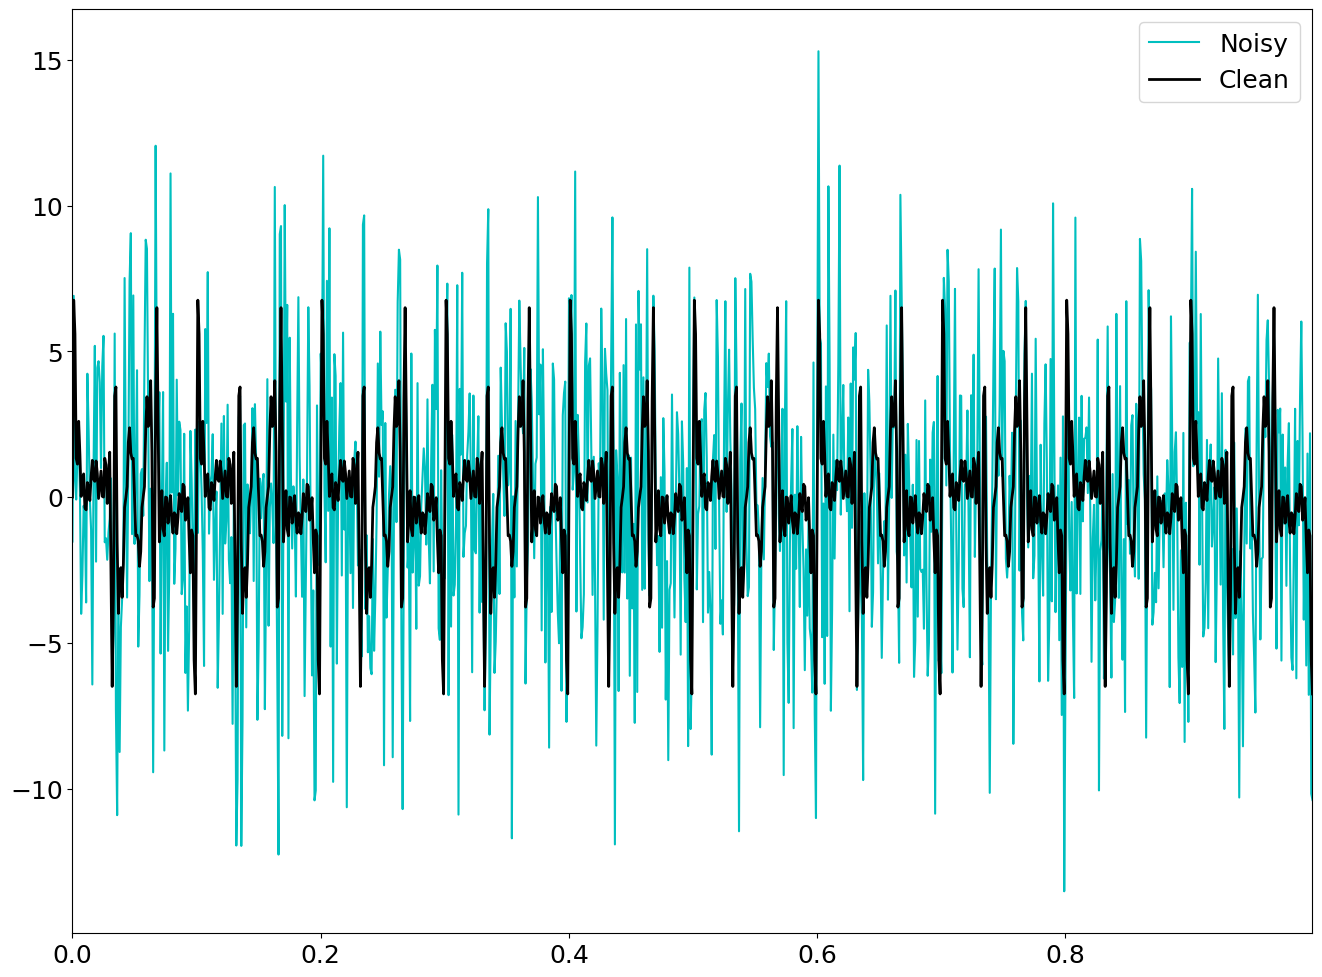

In [ ]:
# Plot the clean and noisy signals
plt.plot(t , f_noisy, color='c', linewidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean')

# Set plot limits and labels
plt.xlim(t[0], t[-1])
plt.legend()

# Show the plot
plt.show()

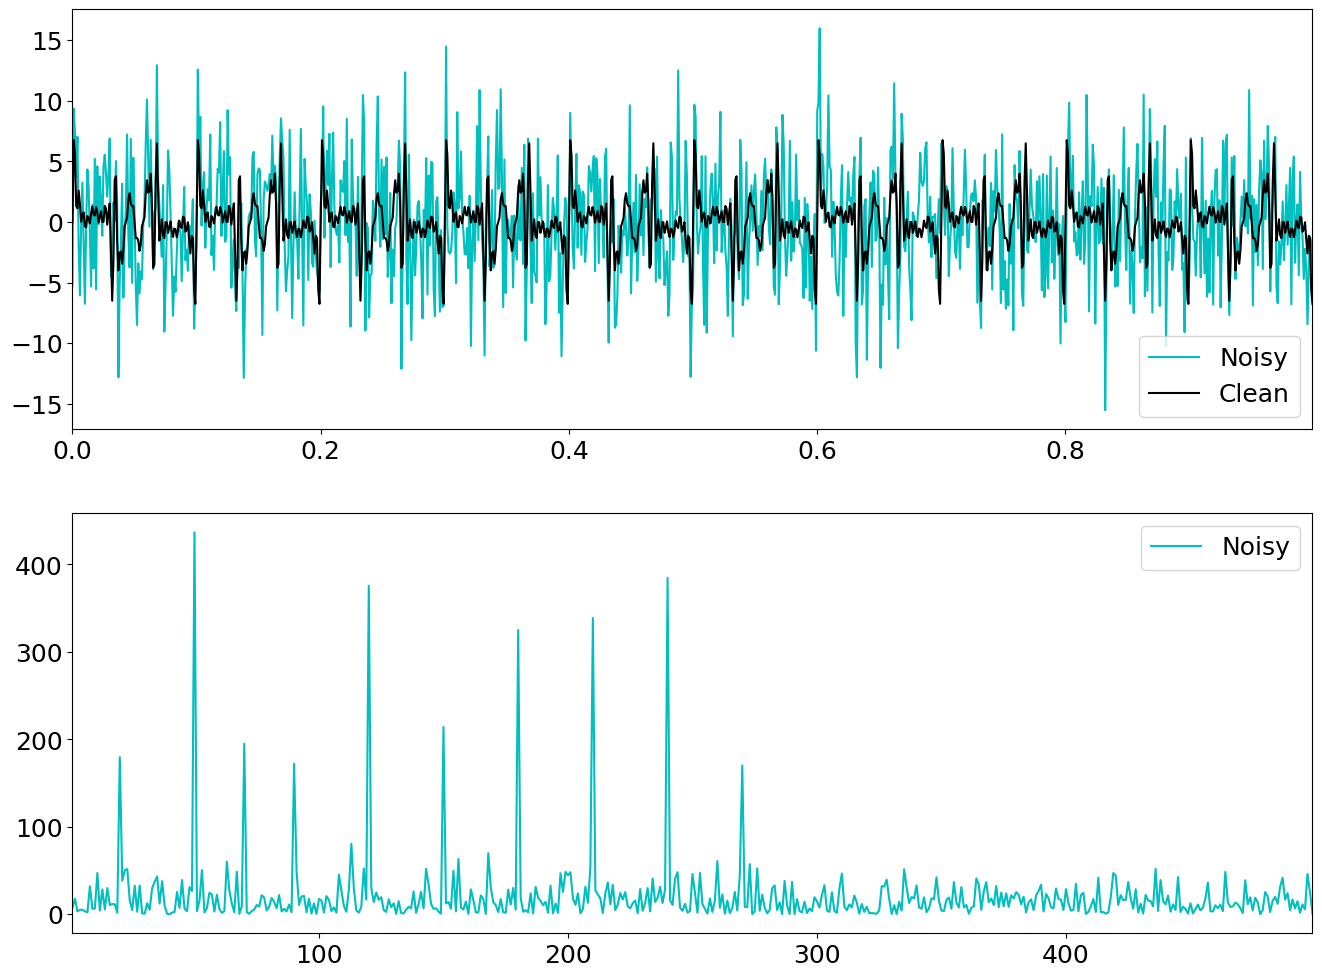

In [ ]:
n = len(t)
fhat = np.fft.fft(f_noisy,n)
PSD =  fhat * np.conj(fhat) / n #power spectral density

freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2), dtype = 'int')

fig,axs =  plt.subplots (2,1)

plt.sca(axs[0])
plt.plot(t,f_noisy,color='c', label='Noisy')
plt.plot(t,f_clean,color='k',  label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c', label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

In [ ]:
# Using the PSD to clear out noise
indices = PSD > 150   # Find all freq with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Foruier coeffs in Y
ffilt = np.fft.ifft(fhat)   # Inverse FFT


In [ ]:
# Audio signal after filtaration

ffilt_extended = np.tile(ffilt , 100)
ffilt_audio_data = ffilt_extended.astype(np.float32)

display(Audio(ffilt_audio_data, autoplay=True, rate=44100))

<ipython-input-8-585c023563fd>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  ffilt_audio_data = ffilt_extended.astype(np.float32)


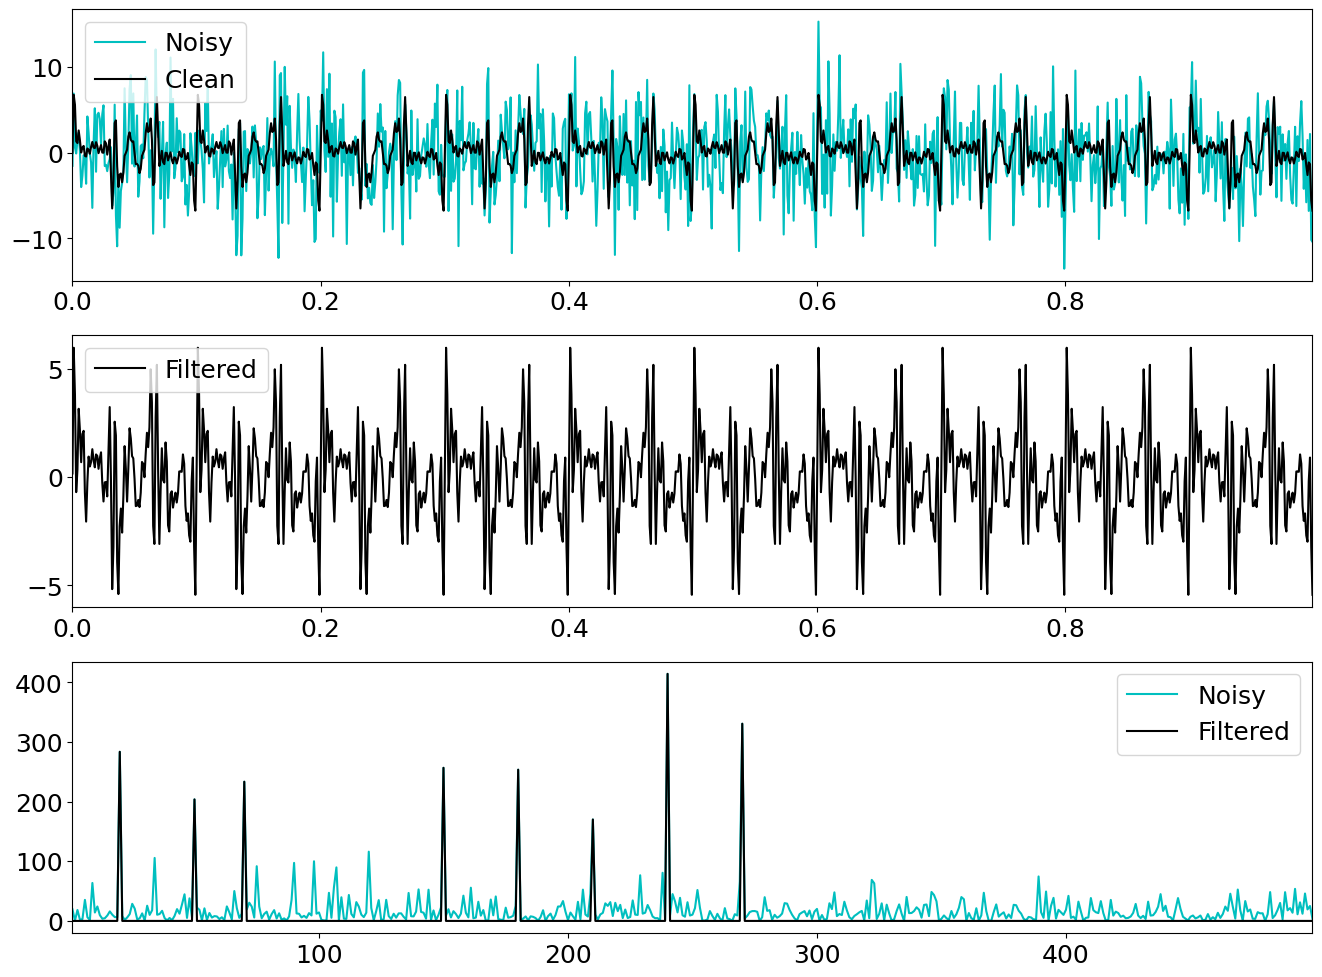

In [ ]:
# Plots

fig,axs =  plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f_noisy, color='c', label='Noisy')
plt.plot(t,f_clean,color='k', label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='k',  label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L] , color = 'c' , label='Noisy')
plt.plot(freq[L], PSDclean[L] , color='k' , label='Filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()